## Linear Regression Demonstration

### Loading the Housing prediction dataset. <br>
For this exercise we will use the Housing Prediction dataset from [Kaggle](https://www.kaggle.com/datasets/ashydv/housing-dataset/).

In [3]:
### Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
### Load libraries
import os # to access mounted files
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
### Read in data
os.chdir("/content/drive/My Drive/HackerDojo_PythonClub/20240319/")
df = pd.read_csv('Housing.csv')
# df.head(3)

## Explore the dataset. <br>
First we will do some quick data exploration

In [ ]:
### What are the features in this dataset?
# df.info()

In [15]:
### Statistic values of our dataset
# df.describe()

In [ ]:
### Plot a pairwise scatter plot
## This type of plotting gives us an idea of the degree of correlation between continuous variable (not categorical).
# sns.pairplot(df)

In [ ]:
### Violin plot to show the distribution of independent variable group by dependent variable value
## Since there are a lot of points in this datasets, we see overplotting.
## This plot type is better if dataset is reduced to descriptive statistic.
# sns.violinplot(x=df['area'], y=df['price'], color='lightblue')


## Simple Linear Regression <br>
For simplicity, lets first look at linear regression with between two variables; housing price and square footage (area)

In [23]:
### Define dependent variable x is price and independent variable y is area
X = df['area'].to_numpy().reshape((-1, 1))
y = df['price'].to_numpy()

In [25]:
### Scatter plot with overlaid regression line
## We use regplot() which is a linear regression model fit to check relationship between area and price
# sns.regplot(x ="area", y ="price", data = df, order=2, ci = None)
# plt.show()

In [ ]:
### Make predictions using sklearn model.predict() of price based on size
## Equivalent to y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
y_pred = model.predict(x)
# print(f"predicted response:\n{y_pred}")

In [20]:
### Plot the observed data with the predicted value
# sns.regplot(x ="area", y ="price", data = df, order=2, ci = None, color="blue")
# sns.regplot(x =df["area"], y =y_pred, order=2, ci = None, color="green")
# plt.title('Predicted vs observed')
# plt.show()

<Axes: xlabel='area', ylabel='price'>

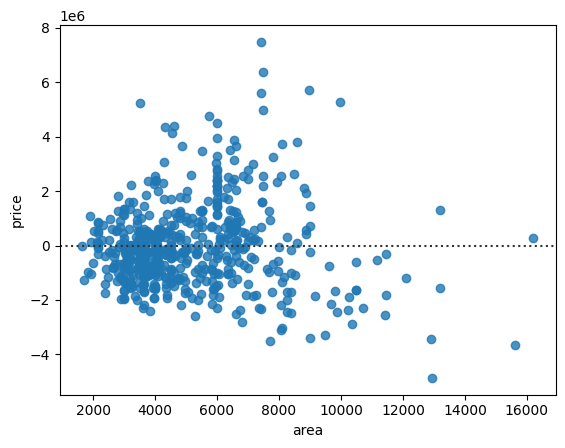

In [11]:
### Residual plot
## To ask how far our predictions are from the actual data point, we can use a residual plot to represent the residuals (errors) in the
## linear regression model. Residuals are the difference between the observed values of the dependent variable and the predicted values
## obtained from the linear regression model, (ie., Residual = Observed – Predicted).
sns.residplot(x='area', y='price', data=df)
# plt.title('Residual plot')
# plt.show()

In [26]:
### Create a regression model as an instance of linear regression and fit it to selected variables
## Properties of the model to get the esimator of regression coefficient
model = LinearRegression().fit(x, y)
print(f"Coefficient of determination (r-square): {model.score(x, y)}")
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_}")

Coefficient of determination (r-square): 0.2872931546811469
Intercept: 2387308.48239643
Slope: [461.97489427]


## Train a linear model
Scikit-learn can split your dataset to training and testing sets. In train_test_split() function we can define our test_size to represent the proportion of the dataset to include in the test split. The random_state parameter controls the shuffling applied to the data before applying the split.

In [27]:
### Split the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train a Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

In [30]:
#Evaluate Linear Regression Model
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)
print("Linear Regression:")
print(f'Mean Squared Error: {linear_mse}')
print(f'R-squared: {linear_r2}')

Linear Regression:
Mean Squared Error: 3675286604768.185
R-squared: 0.27287851871974644
